# Exploring the Amazon Food Reviews Dataset

In [1]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

In [2]:
data = pd.read_csv('data/Reviews.csv', dtype = {'Summary': str})

In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Questions

1. Do people find lenghthier reviews to be more helpful?
2. Which products have received higher scores in reviews?
3. Who are the people whoose reviews have been found to be more helpful?

Although we have data pertaining to number of people who found the reviews helpful and the number of people who did indicate a response. This information by itself is not enought to compare the helpfulness of two reviews. The helpfulness should be factor of both the number of responses(N) and the proportion of the people who found the review to be helpful to the number of people who responded(H). A model would need to be created that would account for both of these factorors(and maybe some more which I haven't even thought of yet.)

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

We shall explore the first question, that is the relationship between the length of the reviews and it's usefulness.

(array([  0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.90000000e+01,   3.90000000e+01,   1.86000000e+02,
          6.11000000e+02,   2.41400000e+03,   4.64700000e+03,
          7.14600000e+03,   1.19350000e+04,   1.59040000e+04,
          1.74790000e+04,   1.76090000e+04,   1.69710000e+04,
          1.63930000e+04,   1.57800000e+04,   1.51780000e+04,
          1.43340000e+04,   1.39250000e+04,   1.29290000e+04,
          1.30190000e+04,   1.22560000e+04,   1.16340000e+04,
          1.12540000e+04,   1.09410000e+04,   1.04180000e+04,
          9.99700000e+03,   9.80300000e+03,   9.54000000e+03,
          9.25500000e+03,   8.85500000e+03,   8.34500000e+03,
          8.15000000e+03,   8.07100000e+03,   7.60500000e+03,
          7.40400000e+03,   6.78700000e+03,   6.82200000e+03,
          6.48100000e+03,   6.32800000e+03,   6.13100000e+03,
          6.03400000e+03,   5.77900000e+03,   5.16600000e+03,
          5.39100000e+03,   5.18000000e+03,   4.81900000e+03,
        

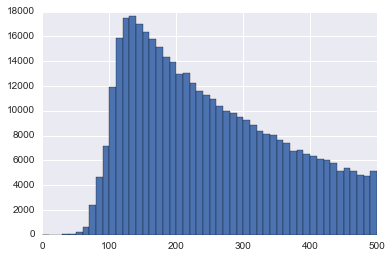

In [5]:
# Add the feature length representing the length of the review text
review_lengths = data['Text'].apply(len)
plt.hist(review_lengths, bins = 50, range = (0,500))

(array([  5.63038000e+05,   4.73700000e+03,   5.48000000e+02,
          9.70000000e+01,   2.30000000e+01,   6.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+00]),
 array([   0. ,   21.4,   42.8,   64.2,   85.6,  107. ,  128.4,  149.8,
         171.2,  192.6,  214. ]),
 <a list of 10 Patch objects>)

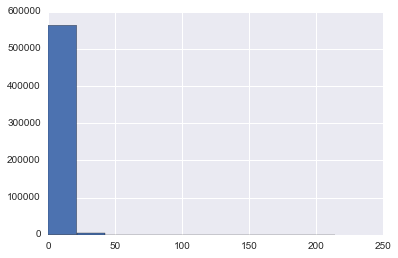

In [6]:
bucketized_review_lengths = review_lengths.apply(lambda x: x // 100)
plt.hist(bucketized_review_lengths)

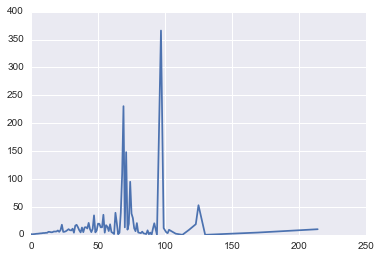

In [7]:
grouped = data['HelpfulnessNumerator'].groupby(bucketized_review_lengths)
plt.plot(grouped.mean())

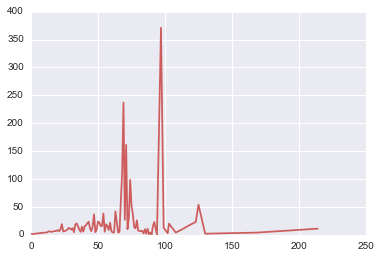

In [8]:
grouped2 = data['HelpfulnessDenominator'].groupby(bucketized_review_lengths)
plt.plot(grouped2.mean(), color='indianred')

In [9]:
difference = data['HelpfulnessDenominator'] - data['HelpfulnessNumerator']
grouped3 = difference.groupby(bucketized_review_lengths)
print(min(difference), max(difference))

-2 140


## Feature engineering with Sentiment Analysis

We hypothesize that the ratings given by the user can be predicted by the Summary and the text of the review.
To verify this we will create new feautes representing the polarities and the subjectivities of the 'Summary' and the 'Text' columns.

In [10]:
from textblob import TextBlob

In [11]:
def compute_sentiment(text):
    text = TextBlob(text)
    return text.sentiment

In [12]:
# The summary column contains nan values that are of types float. We need to replace the nans with empty strings
data.Summary = data.Summary.replace(np.nan, '')
data.Summary.apply(type).unique()

array([<class 'str'>], dtype=object)

In [13]:
summary_sentiments = data['Summary'].apply(compute_sentiment)

In [14]:
#Compute the polarity and subjectivity of the 'Text' column
text_sentiments = data.Text.apply(compute_sentiment)

In [15]:
summary_polarities = summary_sentiments.apply(lambda x: x[0])
summary_subjectivities = summary_sentiments.apply(lambda x: x[1])
text_polarities = text_sentiments.apply(lambda x: x[0])
text_subjectivities = text_sentiments.apply(lambda x: x[1])

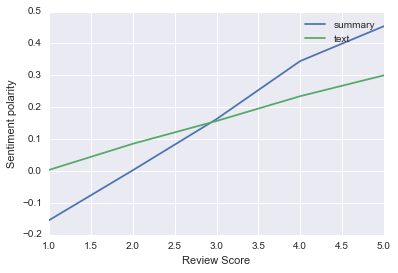

In [16]:
groupedByScore = summary_polarities.groupby(data.Score)
plt.plot(groupedByScore.mean(), label='summary')
plt.plot((text_polarities.groupby(data.Score)).mean(), label='text')
plt.xlabel('Review Score')
plt.ylabel('Sentiment polarity')
plt.legend()
plt.show()

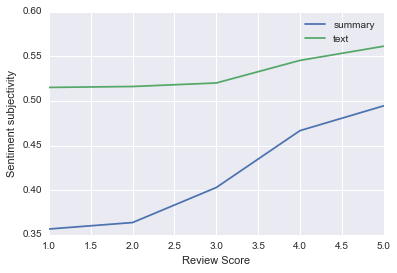

In [17]:
plt.plot((summary_subjectivities.groupby(data.Score)).mean(), label='summary')
plt.plot((text_subjectivities.groupby(data.Score)).mean(), label='text')
plt.xlabel('Review Score')
plt.ylabel('Sentiment subjectivity')
plt.legend()
plt.show()

In [18]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [19]:
X = DataFrame({'summary_polarity': summary_polarities, 'summary_subjectivity': summary_subjectivities, 'text_polarity': text_polarities, 'text_subjectivity': text_subjectivities})
X.head()

,summary_polarity,summary_subjectivity,text_polarity,text_subjectivity
0,0.7,0.60,0.450000,0.433333
1,0.0,0.00,-0.033333,0.762963
2,0.0,0.00,0.133571,0.448571
3,0.0,0.00,0.166667,0.533333
4,0.8,0.75,0.483333,0.637500


In [27]:
X.to_csv('amazon_sentimetns.csv', index = False)

In [20]:
Y = data.Score

In [21]:
logistic_model = LogisticRegression()
logistic_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
logistic_model.score(X, Y)

0.66781129167883413

In [23]:
# logistic_model2 = LogisticRegression()
# Y = np.ravel(Y)
# X = DataFrame({'polarity': text_polarities})
# logistic_model2.fit(X, Y)
# logistic_model2.score(X, Y)


In [24]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print(metrics.accuracy_score(Y_test,class_predict))

0.669525873594
